In [101]:

import sys
import osmnx as ox
import torch as th
import networkx as nx
import dgl

In [102]:
import osmnx

In [103]:
import torch

In [100]:
streets_graph = ox.graph_from_place('Los Angeles, California', network_type='drive')#address：Los Angeles城市名，California

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [ ]:
streets_graph

In [ ]:
import osmnx as ox
ox.plot_graph(ox.graph_from_place('广州市'))

In [ ]:
manhattan_path = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive')

In [ ]:
manhattan_path

In [ ]:
ox.io.save_graphml(manhattan_path, filepath='manhattan_street_gephi_false_wio_simplify.graphml', gephi=False, encoding='utf-8')

In [ ]:
ox.io.save_graphml(manhattan_path, filepath='manhattan_street_gephi_true_wio_simplify.graphml', gephi=True, encoding='utf-8')

In [ ]:
manhattan_path_simplify = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive', simplify=True)

In [ ]:
ox.io.save_graphml(manhattan_path_simplify, filepath='manhattan_street_gephi_false_wi_simplify.graphml', gephi=False, encoding='utf-8')

In [ ]:
ox.io.save_graphml(manhattan_path_simplify, filepath='manhattan_street_gephi_true_wi_simplify.graphml', gephi=True, encoding='utf-8')

In [ ]:
G_simplified =ox.load_graphml('manhattan_street_gephi_false_wio_simplify.graphml')
ox.plot_graph(G_simplified)

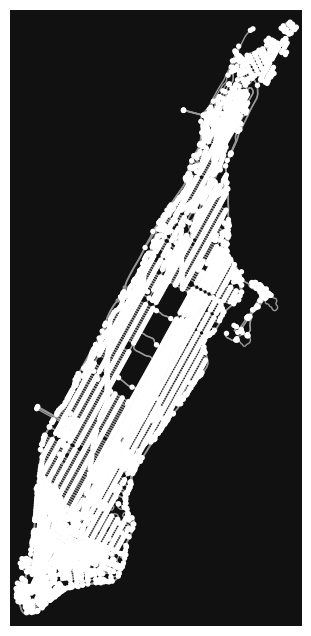

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [104]:
G_simplified =ox.load_graphml('manhattan_street_gephi_false_wi_simplify.graphml')
ox.plot_graph(G_simplified)

In [105]:
G_simplified.nodes

NodeView((42421728, 42421731, 42421737, 42421741, 42421745, 42421749, 42421751, 42421769, 42421772, 42421775, 42421776, 42421778, 42421783, 42421785, 42421786, 42421791, 42421800, 42421803, 42421806, 42421809, 42421810, 42421820, 42421828, 42421852, 42421857, 42421865, 42421877, 42421889, 42421941, 42421946, 42421951, 42421960, 42421965, 42421969, 42421972, 42421974, 42421982, 42421985, 42421993, 42421996, 42422000, 42422006, 42422016, 42422018, 42422026, 42422028, 42422038, 42422042, 42422050, 42422053, 42422086, 42422110, 42422168, 42422258, 42422270, 42422283, 42422399, 42422449, 42422509, 42422592, 42422899, 42423020, 42423039, 42423051, 42423070, 42423101, 42423116, 42423170, 42423189, 42423203, 42423295, 42423296, 42423307, 42423456, 42423514, 42423549, 42423564, 42423565, 42423579, 42423674, 42423752, 42423774, 42423832, 42423836, 42423847, 42423885, 42424025, 42424032, 42424089, 42424117, 42424133, 42424142, 42424145, 42424218, 42424225, 42424235, 42424258, 42424334, 42424347, 

In [ ]:
G_simplified.edges

In [ ]:
G_simplified.edges(data=True)

In [ ]:
G_simplified.edges(data=True)

In [106]:
for edge in G_simplified.edges(data=True):
    # add two node id of edge
    u, v, data = edge
    data['u'] = u
    data['v'] = v

In [ ]:
data

In [ ]:
for edge in G_simplified.edges(data=True):
    print(edge)

In [ ]:
for edge in G_simplified.edges(data=True):
    print("Q")
    print(edge)

In [107]:
g = dgl.DGLGraph()
g = dgl.from_networkx(G_simplified, edge_attrs=['length', 'u', 'v'])

In [108]:
g.num_nodes()

4585

In [109]:
g.is_multigraph

True

In [ ]:
nx.draw(g.to_networkx(), node_size=0.5)

In [ ]:
g

In [ ]:
G_simplified

In [ ]:
nx.draw_networkx_edges(g.to_networkx(), node_size=0.5)

In [110]:
g_line = g.line_graph(shared=True)

In [111]:
g

Graph(num_nodes=4585, num_edges=9866,
      ndata_schemes={}
      edata_schemes={'length': Scheme(shape=(), dtype=torch.float32), 'u': Scheme(shape=(), dtype=torch.int64), 'v': Scheme(shape=(), dtype=torch.int64)})

In [112]:
g_line

Graph(num_nodes=9866, num_edges=22515,
      ndata_schemes={'length': Scheme(shape=(), dtype=torch.float32), 'u': Scheme(shape=(), dtype=torch.int64), 'v': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={})

In [ ]:
g_line[0]

In [ ]:
g_line.ndata['length'][9865]

In [ ]:
g_line.sample_neighbors(0, -1)

In [ ]:
g_line.sample_neighbors(1, -1)

In [128]:
frontier = g_line.sample_neighbors(5, -1)
us = frontier.edges()[0]
vs = frontier.edges()[1]

In [114]:
frontier

Graph(num_nodes=9866, num_edges=4,
      ndata_schemes={'length': Scheme(shape=(), dtype=torch.float32), 'u': Scheme(shape=(), dtype=torch.int64), 'v': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

In [132]:
us[1].item()

7

In [129]:
us

tensor([   2,    7, 3937, 2283])

In [119]:
vs.size()[0]

4

In [120]:
size = 0
for i in range(9866):
    frontier = g_line.sample_neighbors(i, -1)
    us = frontier.edges()[0]
    vs = frontier.edges()[1]
    if size <= us.size()[0]:
        size = us.size()[0]

In [121]:
size

5

In [135]:
discrete_action_dimension = (17, 9)

In [136]:
one_discrete_action_space = np.prod(discrete_action_dimension)

In [137]:
one_discrete_action_space

153

In [138]:
discrete_action_dimension

(17, 9)